# THD Valiadation test

this file will validate the results of the algorithm based on the Fourier series to find the harmonics by the following tests:
$\omega=2\pi*f$
1. A sinusoidal signal of amplitude 1 and frequency 60Hz: $sin(\omega*t)$
2. A cosine signal of amplitude 1 and frequency 60Hz: $cos(\omega*t)$
3. A sinusoidal signal of amplitude 1, frequency 60Hz and 45° dephasing: $sin(\omega*t +45°)$
4. a sum of sinusoidal signals whose fundamental frequency is 60Hz: $10sin(\omega*t)+sin(2\omega*t)+...+\frac{10}{10^{n-1}}sin(n\omega*t) \rightarrow 1\leq n \leq 20$

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def harmonic_spectrum(time,values,f,N=50):
    """
    Inputs:
    >>time    list with time values of the signal
    >>values  list of function values
    >>N       Truncation of the Fourier series //matrix size--> (2N+1,2N+1)
    >>f       Fundamental frequency

    Outputs:
    h_magnitude   list with harmonic amplitude
    example:      [harmonic_0,harmonic_1,harmonic_2,...,harmonic_N]

    """
    #Fourier series analysis

    wo=2*np.pi*f #Angular speed
    A= []        #matrix of values

    #solve matrix-----------------------------------

    for t in time:
        row= [1/2]#starting row
        for k in range(1,N+1):
            val=np.cos(k*wo*t)
            row.append(val)
        for k in range(1,N+1):
            val=np.sin(k*wo*t)
            row.append(val)
        A.append(row)

    A= np.array(A)
    b= np.array(values)
    Coef= np.linalg.solve(np.dot(A.T,A),np.dot(A.T,b))

    #calculating harmonic amplitude
    ao=Coef[0]
    an=Coef[1:N+1]
    bn=Coef[N+1:]
    h_magnitude=[abs(ao)]

    for i in range(len(an)):
        harmonic_i=((an[i]**2)+(bn[i]**2))**(1/2)
        h_magnitude.append(harmonic_i)
        
    return h_magnitude

## test functions

In [28]:
def test_1(time,f=60):
    result=[]
    for i in time:
        val=np.sin(2*np.pi*f*i)
        result.append(val)
    return result

def test_2(time,f=60):
    result=[]
    for i in time:
        val=np.cos(2*np.pi*f*i)
        result.append(val)
    return result

def test_3(time,f=60):
    result=[]
    phase_offset=np.pi/4
    for i in time:
        val=np.sin((2*np.pi*f*i)+phase_offset)
        result.append(val)
    return result

def test_4(time,f=60):
    n=20
    result=[]
    w=2*np.pi*f
    for i in time:
        val=0
        for k in range(1,n+1):
            mag=10/(10**(k-1))
            val+=mag*np.sin(k*w*i)
        result.append(val)
    return result

## Test 1

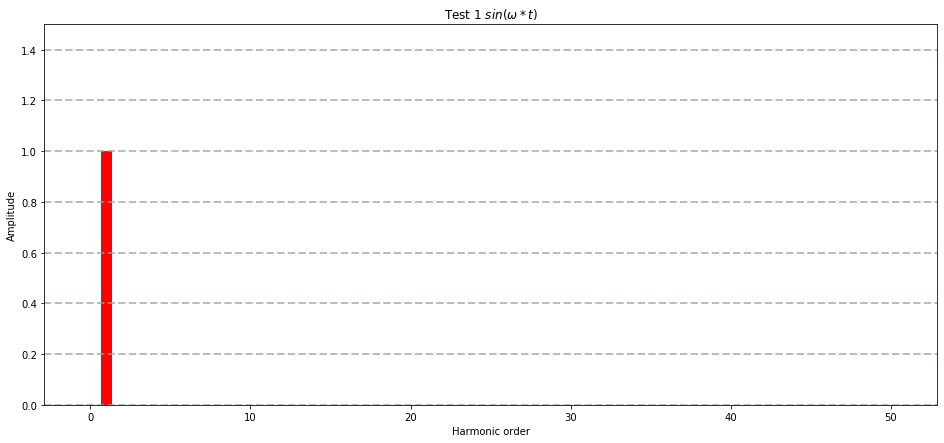

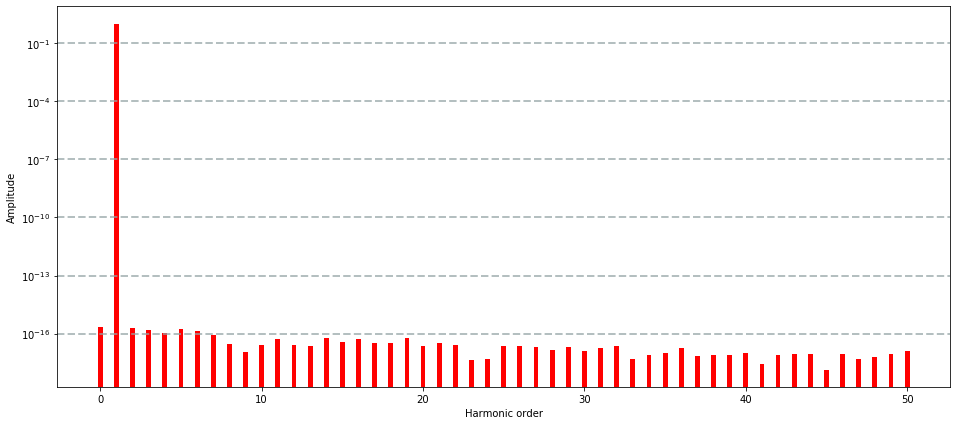

In [19]:
time=np.linspace(0,1/60,1000)
function_val=test_1(time)

h_magnitude=harmonic_spectrum(time,function_val,60)

width=0.7
plt.figure(figsize=(16,7))
plt.title(r"Test 1 $sin(\omega*t)$")
plt.bar(range(len(h_magnitude)),h_magnitude,color='red',width=width)
plt.xlabel(r'Harmonic order')
plt.ylabel(r'Amplitude')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.ylim(0, 1.5) 
plt.show()

width=0.3
plt.figure(figsize=(16,7))
plt.bar(range(len(h_magnitude)),h_magnitude,color='red',width=width)
plt.xlabel(r'Harmonic order')
plt.ylabel(r'Amplitude')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.yscale("log")

## Test 2

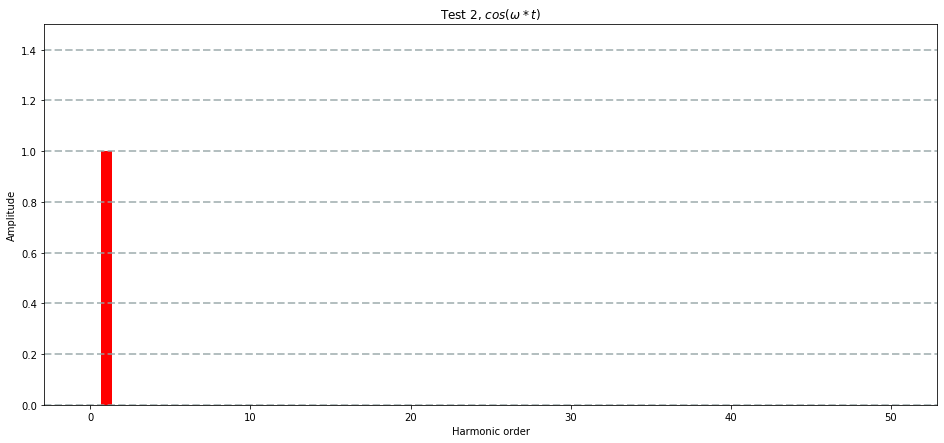

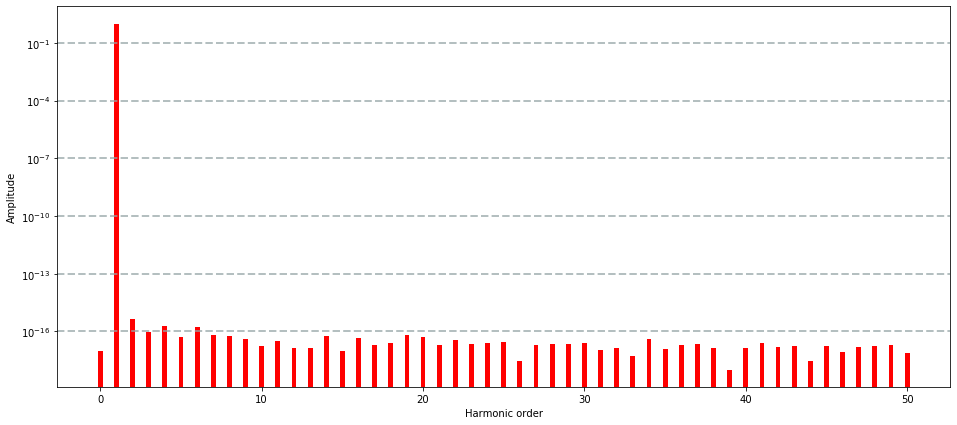

In [25]:
time=np.linspace(0,1/60,1000)
function_val=test_2(time)

h_magnitude=harmonic_spectrum(time,function_val,60)

width=0.7
plt.figure(figsize=(16,7))
plt.title(r"Test 2, $cos(\omega*t)$")
plt.bar(range(len(h_magnitude)),h_magnitude,color='red',width=width)
plt.xlabel(r'Harmonic order')
plt.ylabel(r'Amplitude')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.ylim(0, 1.5) 
plt.show()

width=0.3
plt.figure(figsize=(16,7))
plt.bar(range(len(h_magnitude)),h_magnitude,color='red',width=width)
plt.xlabel(r'Harmonic order')
plt.ylabel(r'Amplitude')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.yscale("log")

## Test 3

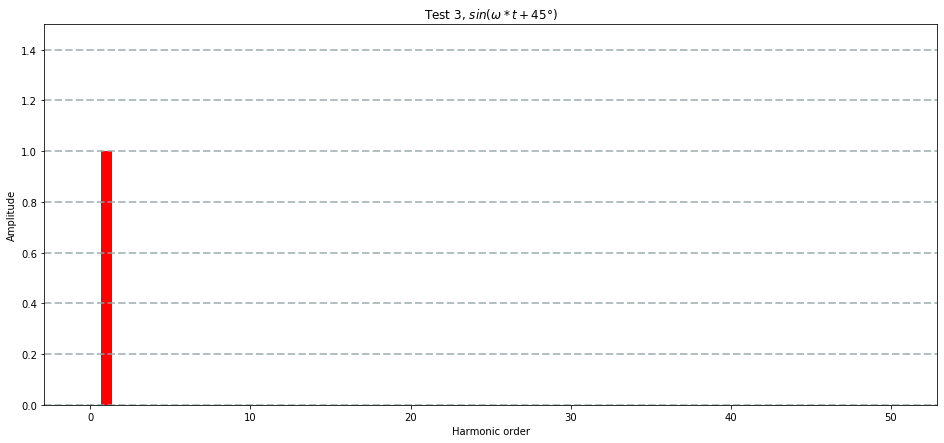

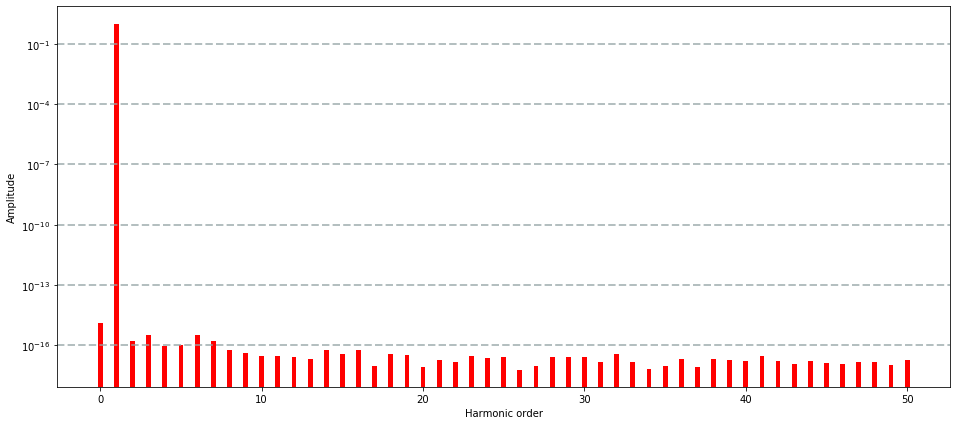

In [24]:
time=np.linspace(0,1/60,1000)
function_val=test_3(time)

h_magnitude=harmonic_spectrum(time,function_val,60)

width=0.7
plt.figure(figsize=(16,7))
plt.title(r"Test 3, $sin(\omega*t +45°)$")
plt.bar(range(len(h_magnitude)),h_magnitude,color='red',width=width)
plt.xlabel(r'Harmonic order')
plt.ylabel(r'Amplitude')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.ylim(0, 1.5) 
plt.show()

width=0.3
plt.figure(figsize=(16,7))
plt.bar(range(len(h_magnitude)),h_magnitude,color='red',width=width)
plt.xlabel(r'Harmonic order')
plt.ylabel(r'Amplitude')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.yscale("log")

## Test 4

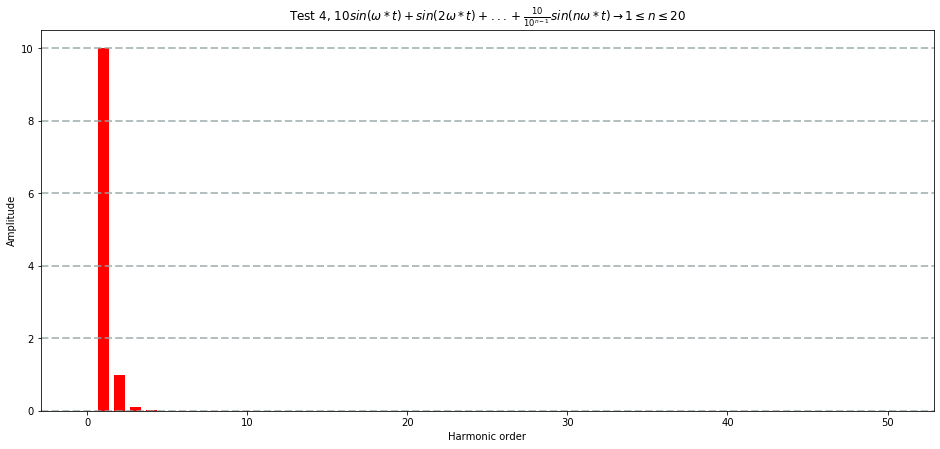

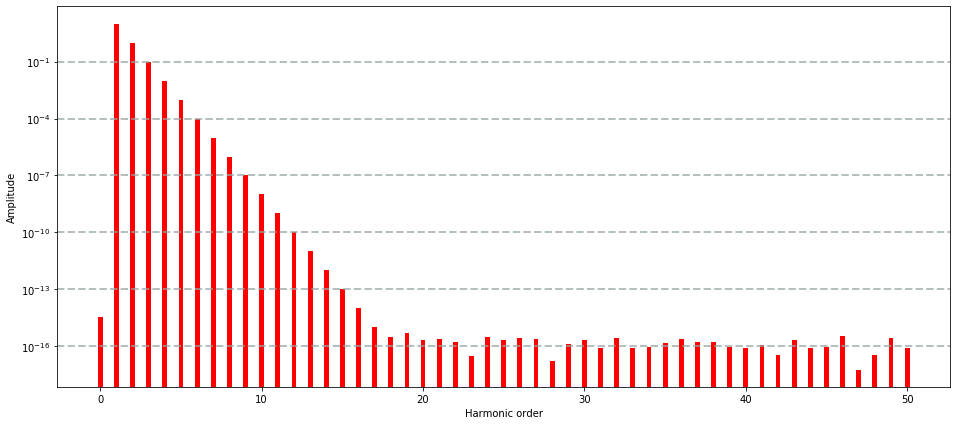

In [29]:
time=np.linspace(0,1/60,1000)
function_val=test_4(time)

h_magnitude=harmonic_spectrum(time,function_val,60)

width=0.7
plt.figure(figsize=(16,7))
plt.title(r"Test 4, $10sin(\omega*t)+sin(2\omega*t)+...+\frac{10}{10^{n-1}}sin(n\omega*t) \rightarrow 1\leq n \leq 20$")
plt.bar(range(len(h_magnitude)),h_magnitude,color='red',width=width)
plt.xlabel(r'Harmonic order')
plt.ylabel(r'Amplitude')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.ylim(0, 10.5) 
plt.show()

width=0.3
plt.figure(figsize=(16,7))
plt.bar(range(len(h_magnitude)),h_magnitude,color='red',width=width)
plt.xlabel(r'Harmonic order')
plt.ylabel(r'Amplitude')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.yscale("log")